In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 데이터 입력 (mm 단위로 변환)
import pandas as pd

df = pd.read_excel('Bench.xlsx',sheet_name='PDO_rate')
df

,vertical,-0.0089,-0.006675,-0.00445,-0.002225,0,0.002225,0.00445,0.006675,0.0089
0,0.000000,7.956020e-10,7.956020e-10,7.956020e-10,7.956020e-10,7.956020e-10,7.956020e-10,7.956020e-10,7.956020e-10,7.956020e-10
1,0.008316,1.481790e-01,1.249800e-01,1.105630e-01,1.031600e-01,1.010620e-01,1.031600e-01,1.105630e-01,1.249800e-01,1.481790e-01
2,0.016632,1.531010e-01,1.423090e-01,1.380230e-01,1.376280e-01,1.379220e-01,1.376280e-01,1.380230e-01,1.423090e-01,1.531010e-01
3,0.024948,1.565150e-01,1.571850e-01,1.620430e-01,1.673930e-01,1.694940e-01,1.673930e-01,1.620430e-01,1.571850e-01,1.565150e-01
4,0.033264,1.589850e-01,1.654870e-01,1.741570e-01,1.813540e-01,1.839570e-01,1.813540e-01,1.741570e-01,1.654870e-01,1.589850e-01
5,0.041580,1.608530e-01,1.697770e-01,1.794570e-01,1.868090e-01,1.894020e-01,1.868090e-01,1.794570e-01,1.697770e-01,1.608530e-01
6,0.049896,1.623250e-01,1.720770e-01,1.817130e-01,1.887310e-01,1.911870e-01,1.887310e-01,1.817130e-01,1.720770e-01,1.623250e-01
7,0.058212,1.635310e-01,1.734000e-01,1.826470e-01,1.892370e-01,1.915400e-01,1.892370e-01,1.826470e-01,1.734000e-01,1.635310e-01
8,0.066528,1.645500e-01,1.742210e-01,1.829920e-01,1.891720e-01,1.913350e-01,1.891720e-01,1.829920e-01,1.742210e-01,1.645500e-01
9,0.074844,1.654360e-01,1.747740e-01,1.830700e-01,1.888850e-01,1.909270e-01,1.888850e-01,1.830700e-01,1.747740e-01,1.654360e-01


In [2]:
vertical = df['vertical'].to_numpy()
horizontal = pd.Series(df.columns[1:].astype(float)).to_numpy()
# df의 각 열(온도 데이터)을 meshgrid 형태로 변환
temperature = df.iloc[:, 1:].to_numpy()

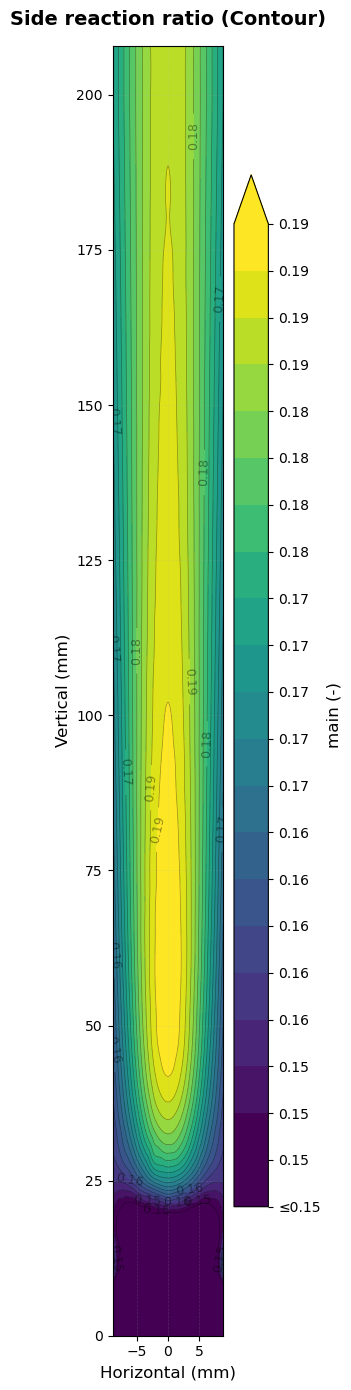

In [3]:
# vertical, horizontal, temperature 변수에 맞게 코드 수정
# 단위가 m이므로 mm로 변환 (1000 곱하기)
vertical_mm = vertical * 1000
horizontal_mm = horizontal * 1000

# 메쉬그리드 생성 (horizontal: x축, vertical: y축, 단위 mm)
X, Y = np.meshgrid(horizontal_mm, vertical_mm)

# 고해상도 보간용 그리드 생성 (단위 mm)
horizontal_fine = np.linspace(horizontal_mm.min(), horizontal_mm.max(), 200)
vertical_fine = np.linspace(vertical_mm.min(), vertical_mm.max(), 500)
X_fine, Y_fine = np.meshgrid(horizontal_fine, vertical_fine)

# 원본 데이터 포인트 (각 위치에 대한 온도값, 단위 mm)
points = np.array([(x, y) for y in vertical_mm for x in horizontal_mm])
values = temperature.flatten()

# cubic 보간으로 부드러운 온도 데이터 생성
temperature_fine = griddata(points, values, (X_fine, Y_fine), method='cubic')

import matplotlib as mpl

# 0.15 이하 값은 모두 같은 색상으로 처리하기 위해 levels 앞에 0.15보다 작은 값을 추가
min_val = 0.15
max_val = np.nanmax(temperature_fine)
# 0.15 이하를 하나의 구간으로, 나머지는 20단계로 나눔
levels = np.concatenate(([temperature_fine.min()-1e-6], np.linspace(min_val, max_val, 21)))  # 0.15 이하 구간 추가

# 컬러맵 생성: 'coolwarm'을 20단계로 사용
base_cmap = plt.get_cmap('viridis', 20)
# 0.15 이하 구간을 위해 컬러맵 앞에 한 칸 추가 (첫 색상 반복)
from matplotlib.colors import ListedColormap
colors = [base_cmap(0)] + [base_cmap(i) for i in range(base_cmap.N)]
custom_cmap = ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(boundaries=levels, ncolors=custom_cmap.N)

# 플롯 생성 (세로로 긴 반응기 형상)
fig, ax = plt.subplots(figsize=(6, 14))

# 등고선 플롯
contourf = ax.contourf(X_fine, Y_fine, temperature_fine, levels=levels, cmap=custom_cmap, norm=norm, extend='max')
contour = ax.contour(X_fine, Y_fine, temperature_fine, levels=levels, colors='black', 
                    linewidths=0.5, alpha=0.4)
ax.clabel(contour, inline=True, fontsize=9, fmt='%.2f')

ax.set_xlabel('Horizontal (mm)', fontsize=12)
ax.set_ylabel('Vertical (mm)', fontsize=12)
ax.set_title('Side reaction ratio (Contour)', fontsize=14, fontweight='bold', pad=15)
ax.set_aspect('equal')

# 컬러바 추가
# 컬러바 tick은 0.15 이하 구간을 '≤0.15'로 표시
# levels의 개수와 tick_labels의 개수를 맞추기 위해 tick_labels 생성 방식 수정
cbar = plt.colorbar(contourf, ax=ax, label='side (-)', pad=0.02, shrink=0.8, aspect=30, ticks=levels)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('main (-)', fontsize=12)
# tick_labels의 개수를 levels와 동일하게 맞춤
tick_labels = [f'≤{min_val:.2f}'] + [f'{l:.2f}' for l in levels[1:]]
cbar.ax.set_yticklabels(tick_labels)

# 그리드 추가
ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [4]:
# 그래프를 파일로 저장 (예: 'temperature_contour.png')
fig.savefig('side_ratio_contour.png', dpi=300, bbox_inches='tight')
